The data set we will be working with contains information on various cars. For each car we have information about the technical aspects of the vehicle such as the motor's displacement, the weight of the car, the miles per gallon, how fast the car accelerates, and more.

Goal : To predict a car's market price using its attributes.

More about the data set can be read [here][1], and the dataset can be downloaded from [here][2].

[1]: https://archive.ics.uci.edu/ml/datasets/automobile
[2]: https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data

# Introduction to the dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from word2number import w2n
%matplotlib inline

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold,cross_val_score
from sklearn.metrics import mean_squared_error

In [2]:
pd.options.display.max_columns = 99

In [3]:
cars = pd.read_csv('imports-85.data')

In [4]:
cars.columns

Index(['3', '?', 'alfa-romero', 'gas', 'std', 'two', 'convertible', 'rwd',
       'front', '88.60', '168.80', '64.10', '48.80', '2548', 'dohc', 'four',
       '130', 'mpfi', '3.47', '2.68', '9.00', '111', '5000', '21', '27',
       '13495'],
      dtype='object')

In [5]:
cars

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,168.80,64.10,48.80,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
200,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
201,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
202,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


There is no column header for the given dataset. Using the dataset's documentation, we'll assign column headers for the columns in the dataset.

## Fixing the column names

In [6]:
column_names = [
                'symboling',
                'normalized-losses',
                'make',
                'fuel-type',
                'aspiration',
                'num-of-doors',
                'body-style',
                'drive-wheels',
                'engine-location',
                'wheel-base',
                'length',
                'width',
                'height',
                'curb-weight',
                'engine-type',
                'num-of-cylinders',
                'engine-size',
                'fuel-system',
                'bore',
                'stroke',
                'compression-ratio',
                'horsepower',
                'peak-rpm',
                'city-mpg',
                'highway-mpg',
                'price'
               ]

cars = pd.read_csv('imports-85.data',names=column_names)

## Dataset columns' values inspection & determination of candidates for use in similarity metric computations, and target column identification

In [7]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [8]:
cars

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


| Attributes                                                                                                      | Type                     | Representation           | Allowed? |
|-----------------------------------------------------------------------------------------------------------------|--------------------------|--------------------------|----------|
| `symboling`                                                                                                     |          ordinal         |             number            |    YES   |
| `wheel-base`,`length`,`width`,`height`,`curb-weight`,`engine-size`,`compression-ratio`,`city-mpg`,`highway-mpg` |          numeric         |          number          |    YES   |
| `normalized-losses`,`bore`,`stroke`,`horsepower`,`peak-rpm`,`price`                                             |          numeric         |   number in string form  |    YES   |
| `num-of-doors`,`num-of-cylinders`                                                                               |          numeric         | number expressed as word |    YES   |
| `make`,`fuel-type`,`aspiration`,`body-style`,`drive-wheels`,`engine-location`,`engine-type`,`fuel-system`       | non-numeric(categorical) |             "            |    NO    |

### Columns that don't meet model requirements

The attributes of the dataset that are categorical in nature are out of contention for use as model features.

### Determination of potential features for use in similarity metric computations (i.e calculating Euclidean distance)

From the table above, ordinal and numeric attributes could be considered for use as model's features

### Target Column Identification

As the goal is to predict a cars's market price, the target column would the `price` attribute.

### Number of missing values in each column

#### Initial observations

In [9]:
cars_columns_num_missing_values = cars.isnull().sum()
cars_columns_num_missing_values

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

Though there aren't any observable missing values at first glance, there could be certain symbols in the dataset that indicate the presence of one.

#### Further inspection

In [10]:
for c_name in cars.columns:
    print(c_name + ":")
    print(cars[c_name].unique())
    print("\n")

symboling:
[ 3  1  2  0 -1 -2]


normalized-losses:
['?' '164' '158' '192' '188' '121' '98' '81' '118' '148' '110' '145' '137'
 '101' '78' '106' '85' '107' '104' '113' '150' '129' '115' '93' '142'
 '161' '153' '125' '128' '122' '103' '168' '108' '194' '231' '119' '154'
 '74' '186' '83' '102' '89' '87' '77' '91' '134' '65' '197' '90' '94'
 '256' '95']


make:
['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']


fuel-type:
['gas' 'diesel']


aspiration:
['std' 'turbo']


num-of-doors:
['two' 'four' '?']


body-style:
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']


drive-wheels:
['rwd' 'fwd' '4wd']


engine-location:
['front' 'rear']


wheel-base:
[ 88.6  94.5  99.8  99.4 105.8  99.5 101.2 103.5 110.   88.4  93.7 103.3
  95.9  86.6  96.5  94.3  96.  113.  102.   93.1  95.3  98.8 104.9 106.7
 115.6  96.6 120.9 112.  

It looks like the `?` symbol indicates a missing value in the dataset.

# Data Cleaning

We usually can't have any missing values if we want to use them for predictive modeling. Let's also rescale the values in the numeric columns so they all range from 0 to 1.

## Replacing the `?` missing value with `np.nan`

In [11]:
cars.replace(to_replace="?",value=np.NaN,inplace=True)
cars.isnull().sum() 

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

## Converting columns to numeric types

### Converting columns containing numbers in strings

In [12]:
num_string_columns = ['normalized-losses','bore','stroke','horsepower','peak-rpm','price']
cars = cars.astype(dtype={col:'float' for col in num_string_columns})

### Converting columns containing numbers expressed as word

In [13]:
num_word_columns = ['num-of-doors','num-of-cylinders']
numeric_words = list(set(np.concatenate([cars[col].unique() for col in num_word_columns])))
numeric_words.remove(np.nan)
numeric_words

['eight', 'five', 'four', 'twelve', 'three', 'two', 'six']

In [14]:
word_to_num_mapping = {word:w2n.word_to_num(word) for word in numeric_words}
word_to_num_mapping

{'eight': 8,
 'five': 5,
 'four': 4,
 'twelve': 12,
 'three': 3,
 'two': 2,
 'six': 6}

In [15]:
cars.replace(word_to_num_mapping,inplace=True)
cars = cars.astype(dtype={col:'float' for col in num_word_columns})

### Final datatypes of the cars dataset

In [16]:
cars.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors         float64
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders     float64
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

## Eliminating non-numeric columns

In [17]:
cars_model_attributes = cars.columns[cars.dtypes != 'object']
cars_model_attributes

Index(['symboling', 'normalized-losses', 'num-of-doors', 'wheel-base',
       'length', 'width', 'height', 'curb-weight', 'num-of-cylinders',
       'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower',
       'peak-rpm', 'city-mpg', 'highway-mpg', 'price'],
      dtype='object')

In [18]:
cars_model_continuous_attributes = [attribute for attribute in cars_model_attributes if attribute not in ['symboling','num-of-doors','num-of-cylinders']]
cars_model_continuous_attributes

['normalized-losses',
 'wheel-base',
 'length',
 'width',
 'height',
 'curb-weight',
 'engine-size',
 'bore',
 'stroke',
 'compression-ratio',
 'horsepower',
 'peak-rpm',
 'city-mpg',
 'highway-mpg',
 'price']

In [19]:
cars_model_data = cars[cars_model_attributes].copy()
cars_model_data

,symboling,normalized-losses,num-of-doors,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,2.0,88.6,168.8,64.1,48.8,2548,4.0,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,2.0,88.6,168.8,64.1,48.8,2548,4.0,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,2.0,94.5,171.2,65.5,52.4,2823,6.0,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,4.0,99.8,176.6,66.2,54.3,2337,4.0,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,4.0,99.4,176.6,66.4,54.3,2824,5.0,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,4.0,109.1,188.8,68.9,55.5,2952,4.0,141,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
201,-1,95.0,4.0,109.1,188.8,68.8,55.5,3049,4.0,141,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
202,-1,95.0,4.0,109.1,188.8,68.9,55.5,3012,6.0,173,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
203,-1,95.0,4.0,109.1,188.8,68.9,55.5,3217,6.0,145,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0


In [20]:
cars_model_continuous_data = cars[cars_model_continuous_attributes].copy()
cars_model_continuous_data

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,NaN,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,164.0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,164.0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,95.0,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
201,95.0,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
202,95.0,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
203,95.0,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0


## Handling missing values

In [21]:
cars_model_continuous_data.isnull().sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

### Handling missing values for `price` column

Since the `price` column is the attribute that we want to estimate, lets drop those rows for which the price is not available.

In [22]:
cars_model_continuous_data.dropna(subset=['price'],inplace=True)
cars_model_continuous_data.reset_index(drop=True,inplace=True)
cars_model_continuous_data.isnull().sum()

normalized-losses    37
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

### Handling missing values for the `normalized-losses` column

In [23]:
cars_model_continuous_data.isnull().sum()['normalized-losses']/cars_model_continuous_data.shape[0]*100

18.407960199004975

About 18% percent of the values are not available for the column. This is a large value and so dropping these many number of rows might not be the best idea. Let's dive deeper.

In [24]:
cars_model_continuous_data['normalized-losses'].describe()

count    164.000000
mean     122.000000
std       35.442168
min       65.000000
25%       94.000000
50%      115.000000
75%      150.000000
max      256.000000
Name: normalized-losses, dtype: float64

(array([17., 46., 31., 20., 21., 18.,  9.,  0.,  1.,  1.]),
 array([ 65. ,  84.1, 103.2, 122.3, 141.4, 160.5, 179.6, 198.7, 217.8,
        236.9, 256. ]),
 <BarContainer object of 10 artists>)

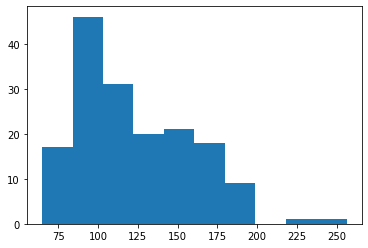

In [25]:
plt.hist(cars_model_continuous_data['normalized-losses'])

Observations:-
1. The average value seems to be a good option for filling in the missing values in the column. 
2. Also, since loss is an important factor in determining prices, dropping the column would increase bias (i.e model could be inaccurate as there is no distinguishing between when the car was bought; this is a huge omission and practically it makes little sense to drop a column that plays a huge role in determining current car prices)

### Handling missing values for the `bore` column

In [26]:
cars_model_continuous_data['bore'].describe()

count    197.000000
mean       3.330711
std        0.270793
min        2.540000
25%        3.150000
50%        3.310000
75%        3.590000
max        3.940000
Name: bore, dtype: float64

(array([ 1.,  1.,  8., 35., 39., 24., 27., 42., 17.,  3.]),
 array([2.54, 2.68, 2.82, 2.96, 3.1 , 3.24, 3.38, 3.52, 3.66, 3.8 , 3.94]),
 <BarContainer object of 10 artists>)

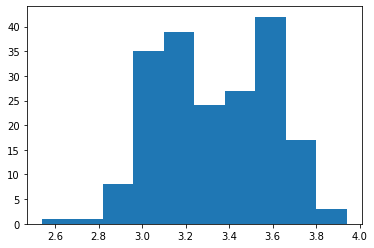

In [27]:
plt.hist(cars_model_continuous_data['bore'])

Observations:-
1. Majority of the values(75%) in the column are bunched up between 3.15 and 3.94, which is about the mean(Note that the standard deviation is pretty less). So the mean seems to be a good estimate for the missing data.

### Handling missing values for `stroke` column

In [28]:
cars_model_continuous_data['stroke'].describe()

count    197.000000
mean       3.256904
std        0.319256
min        2.070000
25%        3.110000
50%        3.290000
75%        3.410000
max        4.170000
Name: stroke, dtype: float64

(array([ 3.,  1., 13.,  7., 27., 52., 70., 15.,  7.,  2.]),
 array([2.07, 2.28, 2.49, 2.7 , 2.91, 3.12, 3.33, 3.54, 3.75, 3.96, 4.17]),
 <BarContainer object of 10 artists>)

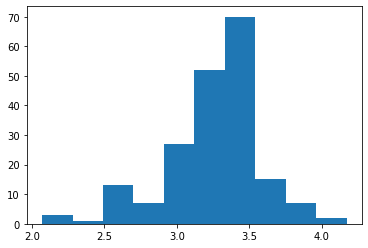

In [29]:
plt.hist(cars_model_continuous_data['stroke'])

Observations:-
1. Majority of the values are clustered in the range of 3.0 to 3.5, in the middle of which the mean lies. Given that most values cluster about the mean, this is a representative value for the entire distribution of car strokes. So, mean should ideally be a good substitute for missing values.

### Handling missing values for `horsepower` column

In [30]:
cars_model_continuous_data['horsepower'].describe()

count    199.000000
mean     103.396985
std       37.553843
min       48.000000
25%       70.000000
50%       95.000000
75%      116.000000
max      262.000000
Name: horsepower, dtype: float64

(array([44., 45., 46., 24., 14., 16.,  5.,  4.,  0.,  1.]),
 array([ 48. ,  69.4,  90.8, 112.2, 133.6, 155. , 176.4, 197.8, 219.2,
        240.6, 262. ]),
 <BarContainer object of 10 artists>)

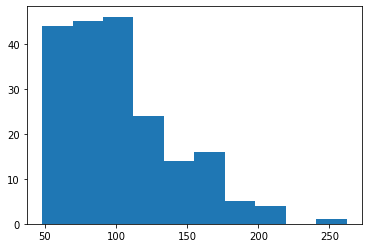

In [31]:
plt.hist(cars_model_continuous_data['horsepower'])

Observations:-
1. In this right skewed distribution, most values lie towards the start of the range of values, which is where the mean lies. So mean horsepower value should serve as a reliable estimate for the 2 missing values.

### Handling missing values for `peak-rpm` column

In [32]:
cars_model_continuous_data['peak-rpm'].describe()

count     199.000000
mean     5117.587940
std       480.521824
min      4150.000000
25%      4800.000000
50%      5200.000000
75%      5500.000000
max      6600.000000
Name: peak-rpm, dtype: float64

(array([17., 10., 41., 31., 31., 48.,  7., 12.,  0.,  2.]),
 array([4150., 4395., 4640., 4885., 5130., 5375., 5620., 5865., 6110.,
        6355., 6600.]),
 <BarContainer object of 10 artists>)

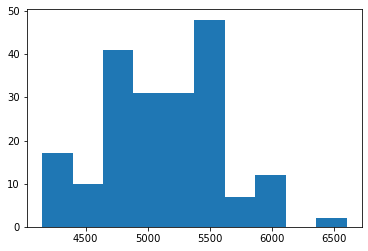

In [33]:
plt.hist(cars_model_continuous_data['peak-rpm'])

Observations:-
1. The mean should be a good estimate for the missing peak-rpm values of 2 observations in the dataset.

### Removing missing values from the feature columns

In [34]:
cars_model_continuous_data = cars_model_continuous_data.fillna(cars_model_continuous_data.mean())

In [35]:
cars_model_continuous_data.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-size          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

## Normalizing the numeric columns

Normalizing all the numeric columns except the target column (i.e. `price`) so that all values range from 0 to 1.

In [36]:
car_market_prices = cars_model_continuous_data['price'].copy()

normalized_car_model_data = ((cars_model_continuous_data - cars_model_continuous_data.min())/(cars_model_continuous_data.max() - cars_model_continuous_data.min())).copy()

normalized_car_model_data['price'] = car_market_prices

# k-nearest neighbors model features, target column, model data, and train/test sets sizes

## Model target column

In [37]:
target_column = 'price'

## Model features

In [38]:
features = [col for col in normalized_car_model_data.columns if col != target_column]
features

['normalized-losses',
 'wheel-base',
 'length',
 'width',
 'height',
 'curb-weight',
 'engine-size',
 'bore',
 'stroke',
 'compression-ratio',
 'horsepower',
 'peak-rpm',
 'city-mpg',
 'highway-mpg']

## Model data

In [39]:
# randomizing the ordering of observations in the dataset to remove the bias originating from original ordering of dataset rows

np.random.seed(1) # to generate reproducible and consistent results
rn_car_model_data = normalized_car_model_data.reindex(index=np.random.permutation(normalized_car_model_data.shape[0]))

## Train/test split sizes

In [40]:
train_set_size = round(rn_car_model_data.shape[0]*0.5)
test_set_size = rn_car_model_data.shape[0] - train_set_size
print(train_set_size,test_set_size)

100 101


# Univariate Model 

Let's start with some univariate k-nearest neighbors models. Starting with simple models before moving to more complex models helps us structure our code workflow and understand the features better.

## Preparing the univariate features

In [41]:
univariate_model_features = [[feature] for feature in features]
univariate_model_features

[['normalized-losses'],
 ['wheel-base'],
 ['length'],
 ['width'],
 ['height'],
 ['curb-weight'],
 ['engine-size'],
 ['bore'],
 ['stroke'],
 ['compression-ratio'],
 ['horsepower'],
 ['peak-rpm'],
 ['city-mpg'],
 ['highway-mpg']]

## Univariate knn model data

In [42]:
univariate_rn_car_model_data = rn_car_model_data.copy()
univariate_rn_car_model_data

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
97,0.214660,0.309038,0.482090,0.418803,0.575000,0.315749,0.222642,0.564286,0.666667,0.09375,0.228972,0.428571,0.388889,0.473684,9549.0
117,0.465969,0.206997,0.241791,0.299145,0.233333,0.185803,0.109434,0.307143,0.552381,0.15000,0.093458,0.551020,0.500000,0.578947,6229.0
59,0.261780,0.355685,0.547761,0.529915,0.641667,0.357642,0.230189,0.607143,0.628571,0.10000,0.168224,0.265306,0.361111,0.421053,10245.0
35,0.068063,0.288630,0.238806,0.307692,0.875000,0.207913,0.116981,0.271429,0.638095,0.13750,0.130841,0.755102,0.472222,0.473684,7295.0
165,0.361257,0.344023,0.523881,0.452991,0.350000,0.412335,0.320755,0.771429,0.680952,0.14375,0.317757,0.265306,0.305556,0.368421,9989.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,0.204188,0.364431,0.679104,0.529915,0.691667,0.527153,0.226415,0.714286,0.476190,0.12500,0.523364,0.551020,0.166667,0.263158,18620.0
137,0.193717,0.309038,0.461194,0.435897,0.391667,0.254849,0.177358,0.771429,0.271429,0.15625,0.158879,0.265306,0.527778,0.552632,7126.0
72,0.298429,0.469388,0.556716,0.658120,0.583333,0.551590,0.298113,0.885714,0.500000,0.06250,0.593458,0.346939,0.166667,0.210526,16503.0
140,0.193717,0.303207,0.461194,0.435897,0.541667,0.347944,0.177358,0.771429,0.271429,0.12500,0.158879,0.265306,0.305556,0.236842,9233.0


##  Function encapsulating the training and simple validation process(train-test validation technique)

### Function performing the training, prediction and validation of model

In [43]:
def knn_train_test(m_feature,target_column,model_data,number_of_neighbours=5):
    train_set = model_data.iloc[0:train_set_size].copy()
    test_set = model_data.iloc[train_set_size:].copy()
    knn = KNeighborsRegressor(n_neighbors=number_of_neighbours)
    knn.fit(train_set[m_feature],train_set[target_column])
    test_set['predicted_price'] = knn.predict(test_set[m_feature])
    model_rmse = np.sqrt(mean_squared_error(test_set[target_column],test_set['predicted_price']))
    return model_rmse

## Determining the feature that performed the best on the default k-value (default number of nearest neighbours)

In [44]:
# quality of a model's predictions can be quantified in terms of error metric computed
model_predictions_quality = list()
for model_feature in univariate_model_features:
    model_error_metric = knn_train_test(model_feature,target_column,univariate_rn_car_model_data)
    model_predictions_quality.append(model_error_metric)

feature_performance = pd.Series(data=model_predictions_quality,index=features)

best_performing_features = feature_performance.sort_values()
best_performing_features

engine-size          3238.462830
horsepower           4037.037713
curb-weight          4401.118255
highway-mpg          4630.026799
width                4704.482590
city-mpg             4766.422505
length               5427.200961
wheel-base           5461.553998
compression-ratio    6610.812153
bore                 6780.627785
normalized-losses    7330.197653
peak-rpm             7697.459696
stroke               8006.529545
height               8144.441043
dtype: float64

The `engine-size` feature performed the best using the default k-value for the knn model used.

## Determining and Visualizing each feature performance for different k-values using the univariate model

In [45]:
# the different number of nearest neighbours to use for training, predicting and validating the univariate model
k_values = [1,3,5,7,9]

# dataframe containing each features performance on the univariate model for different number of nearest neighbours
feature_performance_on_k_values = pd.DataFrame()

### Determination of prediction quality for each feature on all specified k-values

In [46]:
for model_feature in univariate_model_features:
    feature_k_vals_model_predictions_quality = list()
    for k_val in k_values:
        k_val_specific_model_error_metric = knn_train_test(model_feature,target_column,univariate_rn_car_model_data,k_val)
        feature_k_vals_model_predictions_quality.append(k_val_specific_model_error_metric)
    # each feature exists as a single element list, and not as string
    feature_performance_on_k_values[model_feature[0]] = feature_k_vals_model_predictions_quality

# renaming index to reflect the different k-values used
k_values_index_mapper = {idx:k_val for idx,k_val in zip(feature_performance_on_k_values.index,k_values)}

feature_performance_on_k_values.rename(index=k_values_index_mapper,inplace=True)
feature_performance_on_k_values

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
1,7846.750605,4493.734069,4628.455501,4559.257298,8904.046456,5264.290231,3258.486106,8602.588485,9116.495955,8087.205347,4170.054848,9511.480068,5901.143574,6025.594967
3,7500.569812,5120.161506,5129.835821,4606.413692,8277.609643,5022.318012,2840.562806,6984.239489,7338.684670,7375.063686,4020.849263,8537.550900,4646.746409,4617.305020
5,7330.197653,5461.553998,5427.200961,4704.482590,8144.441043,4401.118255,3238.462830,6780.627785,8006.529545,6610.812153,4037.037713,7697.459696,4766.422505,4630.026799
7,7756.421586,5448.107051,5313.427721,4571.485046,7679.598124,4330.608104,3563.086774,6878.097966,7803.937797,6732.801283,4353.811860,7510.294160,5232.523034,4796.061440
9,7688.096097,5738.405685,5383.054515,4652.914172,7811.036063,4632.044474,3831.824415,6866.808502,7735.554366,7024.485525,4515.135617,7340.041341,5465.209493,5278.358057


### Visualizing each feature's performance on all specified k-values

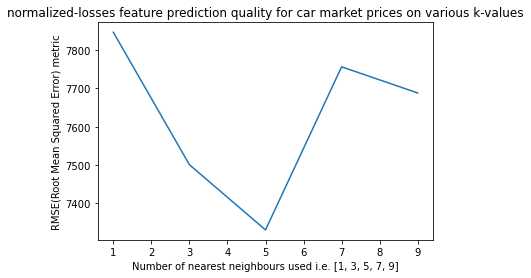

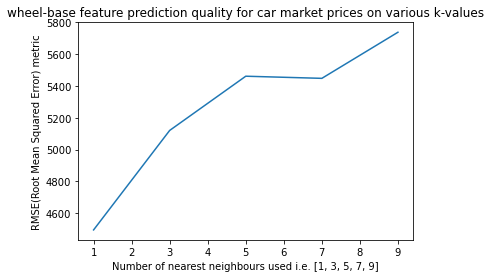

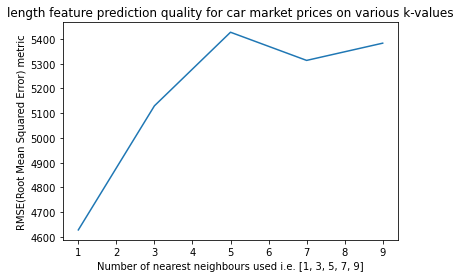

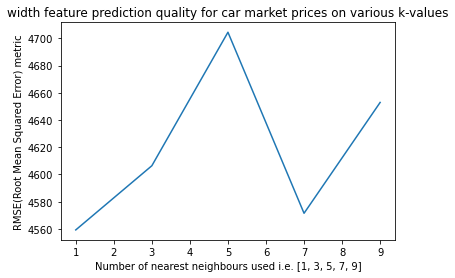

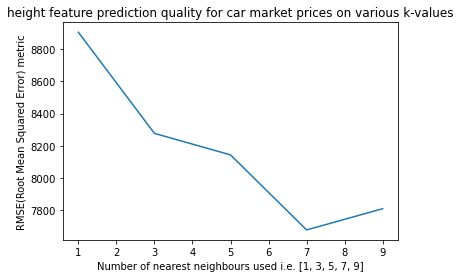

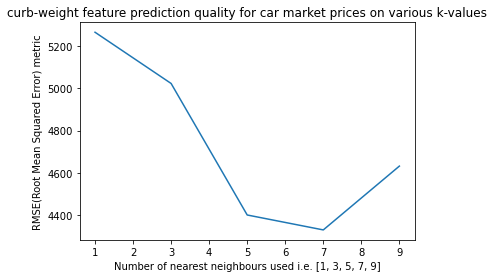

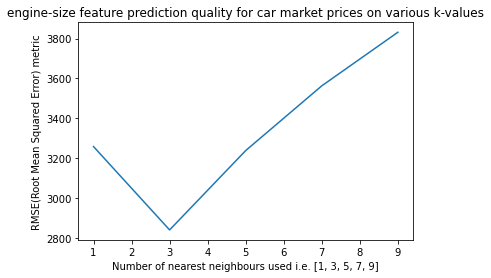

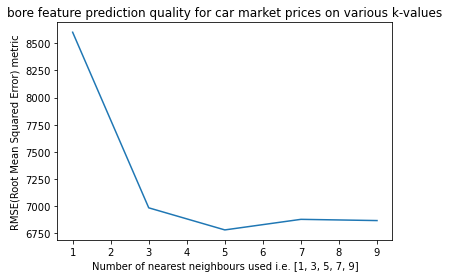

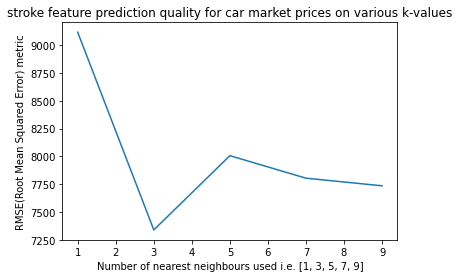

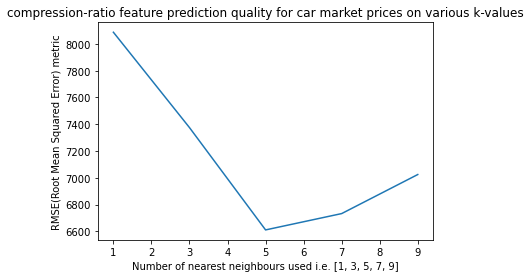

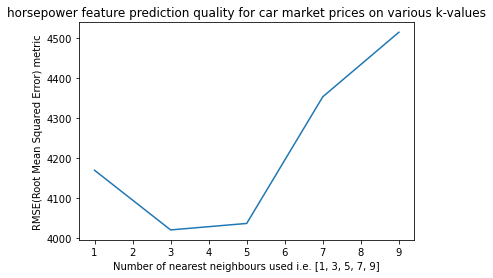

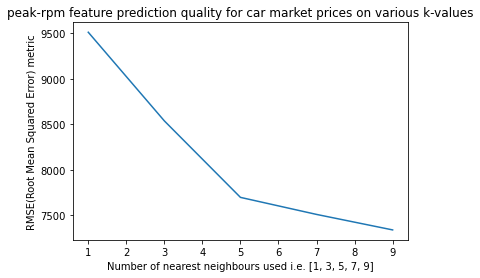

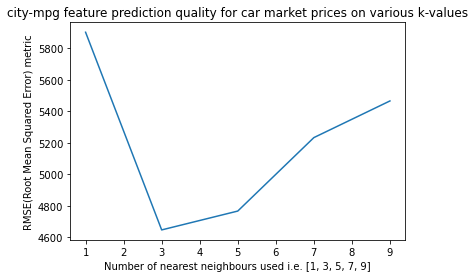

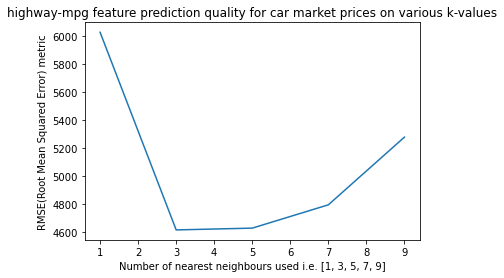

In [47]:
for feature in features:
    feature_performance_on_k_values[feature].plot.line()
    plt.title('{} feature prediction quality for car market prices on various k-values'.format(feature))
    plt.xlabel('Number of nearest neighbours used i.e. {}'.format(k_values))
    plt.ylabel('RMSE(Root Mean Squared Error) metric')
    plt.show()    

# Multivariate Model

## Multivariate knn model data

In [48]:
multivariate_rn_car_model_data = rn_car_model_data.copy()
multivariate_rn_car_model_data

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
97,0.214660,0.309038,0.482090,0.418803,0.575000,0.315749,0.222642,0.564286,0.666667,0.09375,0.228972,0.428571,0.388889,0.473684,9549.0
117,0.465969,0.206997,0.241791,0.299145,0.233333,0.185803,0.109434,0.307143,0.552381,0.15000,0.093458,0.551020,0.500000,0.578947,6229.0
59,0.261780,0.355685,0.547761,0.529915,0.641667,0.357642,0.230189,0.607143,0.628571,0.10000,0.168224,0.265306,0.361111,0.421053,10245.0
35,0.068063,0.288630,0.238806,0.307692,0.875000,0.207913,0.116981,0.271429,0.638095,0.13750,0.130841,0.755102,0.472222,0.473684,7295.0
165,0.361257,0.344023,0.523881,0.452991,0.350000,0.412335,0.320755,0.771429,0.680952,0.14375,0.317757,0.265306,0.305556,0.368421,9989.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,0.204188,0.364431,0.679104,0.529915,0.691667,0.527153,0.226415,0.714286,0.476190,0.12500,0.523364,0.551020,0.166667,0.263158,18620.0
137,0.193717,0.309038,0.461194,0.435897,0.391667,0.254849,0.177358,0.771429,0.271429,0.15625,0.158879,0.265306,0.527778,0.552632,7126.0
72,0.298429,0.469388,0.556716,0.658120,0.583333,0.551590,0.298113,0.885714,0.500000,0.06250,0.593458,0.346939,0.166667,0.210526,16503.0
140,0.193717,0.303207,0.461194,0.435897,0.541667,0.347944,0.177358,0.771429,0.271429,0.12500,0.158879,0.265306,0.305556,0.236842,9233.0


## Calculating average prediction quality across the specified k-values for each feature

In [49]:
avg_feature_performance = feature_performance_on_k_values.mean()
avg_feature_performance

normalized-losses    7624.407151
wheel-base           5252.392462
length               5176.394904
width                4618.910560
height               8163.346266
curb-weight          4730.075815
engine-size          3346.484586
bore                 7222.472445
stroke               8000.240467
compression-ratio    7166.073599
horsepower           4219.377860
peak-rpm             8119.365233
city-mpg             5202.409003
highway-mpg          5069.469256
dtype: float64

## Best features to train a multi-variate knn model on using average RMSE metric

In [50]:
best_avg_feature_performance = avg_feature_performance.sort_values()
best_avg_feature_performance

engine-size          3346.484586
horsepower           4219.377860
width                4618.910560
curb-weight          4730.075815
highway-mpg          5069.469256
length               5176.394904
city-mpg             5202.409003
wheel-base           5252.392462
compression-ratio    7166.073599
bore                 7222.472445
normalized-losses    7624.407151
stroke               8000.240467
peak-rpm             8119.365233
height               8163.346266
dtype: float64

## Determining multi-variate knn model (using default k-value) prediction quality using different number of 'best' features

In [51]:
number_of_best_features = list(range(2,7))
number_of_best_features

[2, 3, 4, 5, 6]

### Determining multi-variate knn model prediction qualilty for different number of 'best' features

In [52]:
rmse_values = list()
for num_feature in number_of_best_features:
    features = list(best_avg_feature_performance.index[:num_feature])
    multi_variate_model_error_metric = knn_train_test(features,target_column,multivariate_rn_car_model_data)
    rmse_values.append(multi_variate_model_error_metric)

num_features_based_prediction_quality= pd.Series(rmse_values,index=number_of_best_features)
num_features_based_prediction_quality

2    2949.881728
3    3580.737665
4    3487.340917
5    3410.217013
6    3478.510890
dtype: float64

# Hyperparameter Tuning

Let's now optimize the model that performed the best in the previous step.

## Determining the best models (based on RMSE metric)

In [53]:
best_num_features_based_prediction_quality = num_features_based_prediction_quality.sort_values()
best_num_features_based_prediction_quality

2    2949.881728
5    3410.217013
6    3478.510890
4    3487.340917
3    3580.737665
dtype: float64

In [54]:
top_3_best_number_of_features = best_num_features_based_prediction_quality.index[:3]
top_3_best_number_of_features

Int64Index([2, 5, 6], dtype='int64')

The best 3 multivariate knn models (based on least values of the RMSE metric) are those that use 2,5 and 6 number of features for their modelling.

## Varying hyperparameter value (i.e. number of nearest neighbours) to find the optimal k-value for each of the best models

In [55]:
hyperparameter_values = list(range(1,26))
print(hyperparameter_values)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]


### Prediction qualities for each best feature set on all specified hyperparameter values

In [56]:
# computing RMSE value for each k-value specified on each of the 3 best performing feature sets 
h_vals_prediction_qualities = pd.DataFrame()
for num_feature in top_3_best_number_of_features:
    rmse_values = list()
    features = list(best_avg_feature_performance.index[:num_feature])
    for h_val in hyperparameter_values:
        h_val_error_metric = knn_train_test(features,target_column,multivariate_rn_car_model_data,h_val)
        rmse_values.append(h_val_error_metric)
    h_vals_prediction_qualities['{} num best features'.format(num_feature)] = rmse_values

h_vals_prediction_qualities.rename(index = {idx:idx+1 for idx in h_vals_prediction_qualities.index},inplace=True)
h_vals_prediction_qualities

,2 num best features,5 num best features,6 num best features
1,2783.620424,2824.706123,2912.593824
2,2657.796381,2915.673165,3166.153231
3,2792.586573,3012.420455,2946.297424
4,2891.532969,3202.887605,3236.667971
5,2949.881728,3410.217013,3478.510890
6,3096.402602,3618.450943,3682.857366
7,3164.681969,3622.629021,3808.418131
8,3413.228359,3848.635836,3957.028826
9,3748.671660,3977.814914,4013.900022
10,4080.712506,3994.813221,4048.997628


### Visualizing the aforementioned prediction qualities

Text(0, 0.5, 'RMSE values')

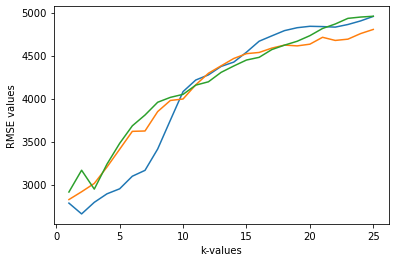

In [57]:
for col in h_vals_prediction_qualities.columns:
    plt.plot(h_vals_prediction_qualities[col],label="{}".format(col))
plt.xlabel('k-values')
plt.ylabel('RMSE values')

### Determining optimal k-value for each best feature set

In [58]:
feature_set_optimal_k_value = dict()
for col in h_vals_prediction_qualities.columns:
    optimal_k_val = h_vals_prediction_qualities[col].sort_values().index[0]
    feature_set_optimal_k_value[col] = optimal_k_val

feature_set_optimal_k_value

{'2 num best features': 2, '5 num best features': 1, '6 num best features': 1}

Observations:-
1. The optimal k-values for multivariate models trained on each of the 3 best performing feature sets are not starkly different.
2. For multivariate knn models trained using the best 5 or 6 features, k-value used is 1. The high variance of a complex knn model (model complexity is measured in terms of number of features used to construct the model) like the ones we observe for those models constructed using the best 5 or 6 length feature sets, can be attributed to the low value of number of nearest neighbours.
3. The multivariate knn model trained using the 2 best features has a higher k-value than those for the 2 aforementioned cases. The lower model complexity associated with using this feature set is due to the fact that the greater number of nearest neighbours makes variability in predicted values less, and so the variance is less. This accounts for the lower average RMSE metric (lower error metric usually implies a better prediction quality, wherein quality is measured in terms of inaccuracy of predicted values from actual values.)

# Using k-fold cross validation technique instead of the simple validation technique used earlier

## Function using k-fold cross validation technique

In [59]:
def knn_k_fold_cross_validation(m_feature,target_column,model_data,number_of_neighbours=5,num_folds=10,scoring_metric='neg_mean_squared_error'):
    # instantiating the scikit-learn model class we want to fit(in this case, KNeighboursRegressor)
    knn = KNeighborsRegressor(n_neighbors=number_of_neighbours)
    
    # instantiating the KFold class and using the parameters to specify the k-fold cross-validation attributes we want
    kf = KFold(n_splits = num_folds,shuffle=True,random_state=1)
    
    # use the cross_val_score() function to return the scoring metric we're interested in.
    model_mses = cross_val_score(estimator=knn,X=model_data[m_feature],y=model_data[target_column],scoring=scoring_metric,cv=kf)
    
    # 1. returned mses are negative in sign, so find absolute values
    # 2. we need to calculate RMSE values as they are in same units as predicted feature and intuitive
    # 3. Mean RMSE value gives an overall picture of the quality of a model's predictions
    model_avg_rmse = np.mean(np.sqrt(np.absolute(model_mses)))
    return model_avg_rmse

This is a more rigorous and unbiased validation technique compared to the holdout validation technique that we saw earlier(i.e. number of fold = 2)

## Univariate Model

In [60]:
features = [col for col in normalized_car_model_data.columns if col != target_column]
features

['normalized-losses',
 'wheel-base',
 'length',
 'width',
 'height',
 'curb-weight',
 'engine-size',
 'bore',
 'stroke',
 'compression-ratio',
 'horsepower',
 'peak-rpm',
 'city-mpg',
 'highway-mpg']

### Determining the feature that performed the best on the default k-value (default number of nearest neighbours)

In [61]:
# quality of a model's predictions can be quantified in terms of error metric computed
model_predictions_quality = list()
for model_feature in univariate_model_features:
    model_error_metric = knn_k_fold_cross_validation(model_feature,target_column,normalized_car_model_data)
    model_predictions_quality.append(model_error_metric)

model_predictions_quality
feature_performance = pd.Series(data=model_predictions_quality,index=features)

best_performing_features = feature_performance.sort_values()
best_performing_features

engine-size          3043.502927
horsepower           3801.849871
highway-mpg          4180.874800
width                4209.420018
curb-weight          4234.188078
city-mpg             4305.536968
length               5344.389417
wheel-base           5725.179143
compression-ratio    6082.597131
normalized-losses    6671.869661
bore                 6914.254048
stroke               7297.139641
peak-rpm             7510.544452
height               7702.821601
dtype: float64

The `engine-size` feature performed the best using the default k-value for the knn model used.

### Determining and Visualizing each feature performance for different k-values using the univariate model

In [62]:
# the different number of nearest neighbours to use for training, predicting and validating the univariate model
k_values = [1,3,5,7,9]

# dataframe containing each features performance on the univariate model for different number of nearest neighbours
feature_performance_on_k_values = pd.DataFrame()

#### Determination of prediction quality for each feature on all specified k-values

In [63]:
for model_feature in univariate_model_features:
    feature_k_vals_model_predictions_quality = list()
    for k_val in k_values:
        k_val_specific_model_error_metric = knn_k_fold_cross_validation(model_feature,target_column,normalized_car_model_data,k_val)
        feature_k_vals_model_predictions_quality.append(k_val_specific_model_error_metric)
    # each feature exists as a single element list, and not as string
    feature_performance_on_k_values[model_feature[0]] = feature_k_vals_model_predictions_quality

# renaming index to reflect the different k-values used
k_values_index_mapper = {idx:k_val for idx,k_val in zip(feature_performance_on_k_values.index,k_values)}

feature_performance_on_k_values.rename(index=k_values_index_mapper,inplace=True)
feature_performance_on_k_values

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
1,7579.057448,4127.664023,4898.478019,4066.868124,8392.337279,5157.859842,3601.796747,8057.920723,8225.659301,6741.420713,3991.682326,8725.320610,5756.990928,5108.460253
3,7148.990331,4791.446221,5055.359831,4014.256862,7867.419571,4495.974906,3054.441896,6514.966390,7273.057903,5821.947865,3860.005144,7721.733869,4388.057423,4648.040609
5,6671.869661,5725.179143,5344.389417,4209.420018,7702.821601,4234.188078,3043.502927,6914.254048,7297.139641,6082.597131,3801.849871,7510.544452,4305.536968,4180.874800
7,7076.278964,5949.354619,5407.596946,4362.409681,7663.933333,4065.269237,3346.551409,6940.746752,7332.833386,6251.986521,3799.826781,7487.471490,4247.140019,4136.835757
9,7376.047238,5847.402960,5461.100326,4316.124588,7491.422748,3961.532240,3496.675613,6752.362175,7299.626100,6330.739278,3843.219943,7564.611083,4414.995561,4168.970779


#### Visualizing each feature's performance on all specified k-values

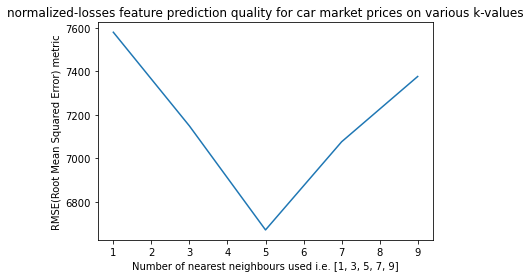

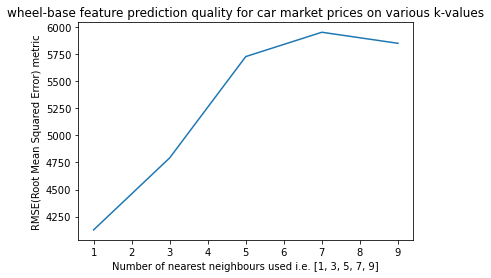

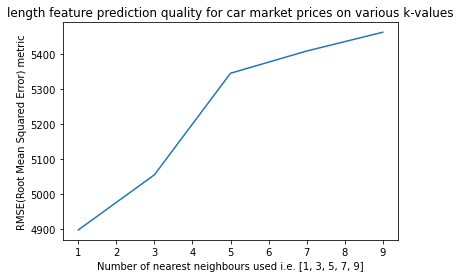

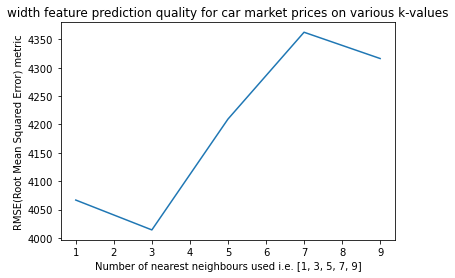

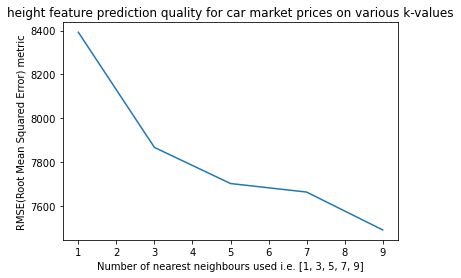

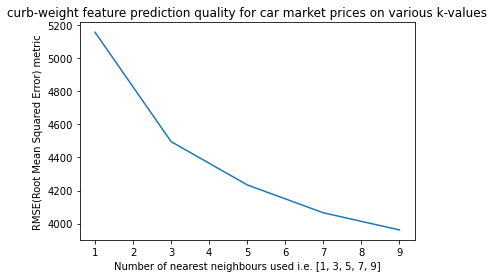

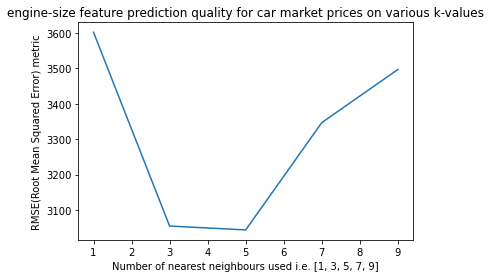

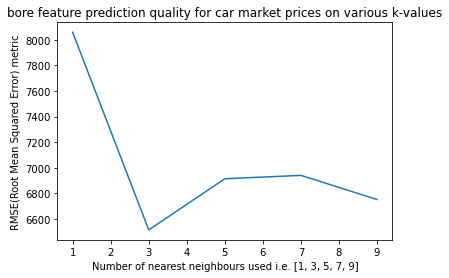

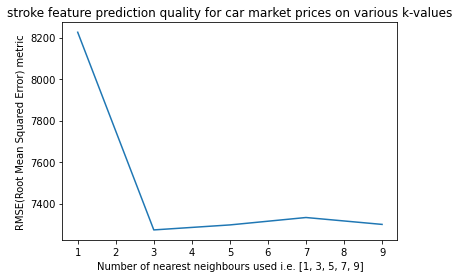

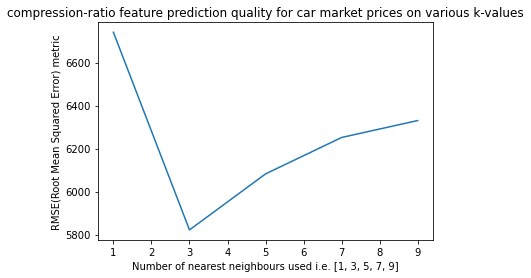

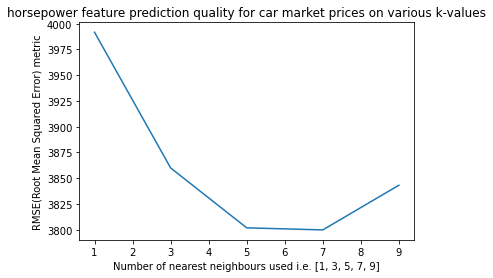

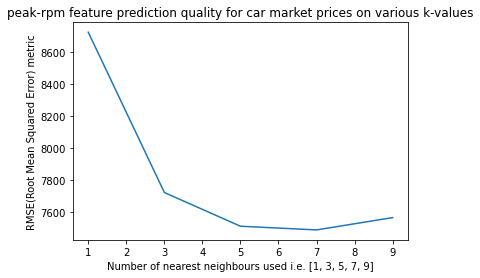

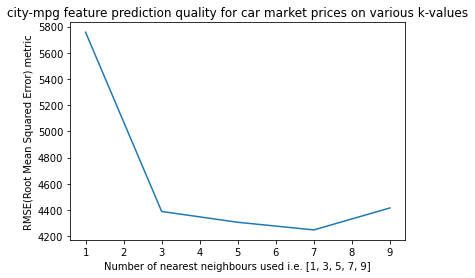

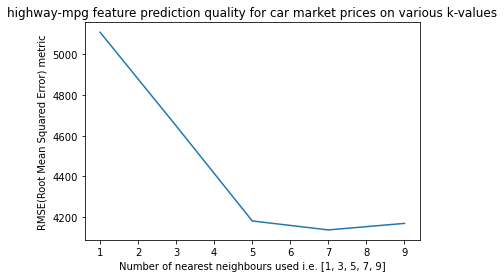

In [64]:
for feature in features:
    feature_performance_on_k_values[feature].plot.line()
    plt.title('{} feature prediction quality for car market prices on various k-values'.format(feature))
    plt.xlabel('Number of nearest neighbours used i.e. {}'.format(k_values))
    plt.ylabel('RMSE(Root Mean Squared Error) metric')
    plt.show()

## Multivariate Model

### Calculating average prediction quality across the specified k-values for each feature

In [65]:
avg_feature_performance = feature_performance_on_k_values.mean()
avg_feature_performance

normalized-losses    7170.448729
wheel-base           5288.209393
length               5233.384908
width                4193.815855
height               7823.586906
curb-weight          4382.964861
engine-size          3308.593718
bore                 7036.050018
stroke               7485.663266
compression-ratio    6245.738302
horsepower           3859.316813
peak-rpm             7801.936301
city-mpg             4622.544180
highway-mpg          4448.636439
dtype: float64

### Best features to train a multi-variate knn model on using average RMSE metric

In [66]:
best_avg_feature_performance = avg_feature_performance.sort_values()
best_avg_feature_performance

engine-size          3308.593718
horsepower           3859.316813
width                4193.815855
curb-weight          4382.964861
highway-mpg          4448.636439
city-mpg             4622.544180
length               5233.384908
wheel-base           5288.209393
compression-ratio    6245.738302
bore                 7036.050018
normalized-losses    7170.448729
stroke               7485.663266
peak-rpm             7801.936301
height               7823.586906
dtype: float64

### Determining multi-variate knn model (using default k-value) prediction quality using different number of 'best' features

In [67]:
number_of_best_features

[2, 3, 4, 5, 6]

#### Determining multi-variate knn model prediction qualilty for different number of 'best' features

In [68]:
avg_rmse_values = list()
for num_feature in number_of_best_features:
    features = list(best_avg_feature_performance.index[:num_feature])
    multi_variate_model_error_metric = knn_train_test(features,target_column,multivariate_rn_car_model_data)
    avg_rmse_values.append(multi_variate_model_error_metric)

num_features_based_prediction_quality= pd.Series(avg_rmse_values,index=number_of_best_features)
num_features_based_prediction_quality

2    2949.881728
3    3580.737665
4    3487.340917
5    3410.217013
6    3416.536073
dtype: float64

### Hyperparameter Tuning

Let's now optimize the model that performed the best in the previous step.

#### Determining the best models (based on RMSE metric)

In [69]:
best_num_features_based_prediction_quality = num_features_based_prediction_quality.sort_values()
best_num_features_based_prediction_quality

2    2949.881728
5    3410.217013
6    3416.536073
4    3487.340917
3    3580.737665
dtype: float64

In [70]:
top_3_best_number_of_features = best_num_features_based_prediction_quality.index[:3]
top_3_best_number_of_features

Int64Index([2, 5, 6], dtype='int64')

The best 3 multivariate knn models (based on least values of the RMSE metric) are those that use 2,3 and 4 number of features for their modelling.

#### Varying hyperparameter value (i.e. number of nearest neighbours) to find the optimal k-value for each of the best models

In [71]:
hyperparameter_values = list(range(1,26))
print(hyperparameter_values)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]


##### Prediction qualities for each best feature set on all specified hyperparameter values

In [72]:
# computing average RMSE value for each k-value specified on each of the 3 best performing feature sets 
h_vals_prediction_qualities = pd.DataFrame()
for num_feature in top_3_best_number_of_features:
    avg_rmse_values = list()
    features = list(best_avg_feature_performance.index[:num_feature])
    for h_val in hyperparameter_values:
        h_val_error_metric = knn_train_test(features,target_column,multivariate_rn_car_model_data,h_val)
        avg_rmse_values.append(h_val_error_metric)
    h_vals_prediction_qualities['{} num best features'.format(num_feature)] = avg_rmse_values

h_vals_prediction_qualities.rename(index = {idx:idx+1 for idx in h_vals_prediction_qualities.index},inplace=True)
h_vals_prediction_qualities

,2 num best features,5 num best features,6 num best features
1,2783.620424,2824.706123,2764.413626
2,2657.796381,2915.673165,2814.672472
3,2792.586573,3012.420455,2904.741121
4,2891.532969,3202.887605,3121.637407
5,2949.881728,3410.217013,3416.536073
6,3096.402602,3618.450943,3570.361565
7,3164.681969,3622.629021,3512.537319
8,3413.228359,3848.635836,3807.614182
9,3748.671660,3977.814914,3899.587950
10,4080.712506,3994.813221,4032.701836


##### Visualizing the aforementioned prediction qualities

Text(0, 0.5, 'RMSE values')

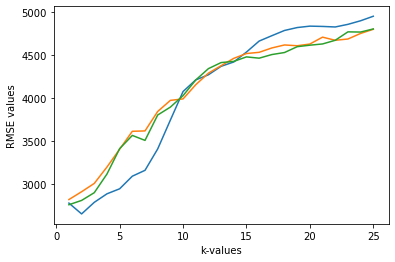

In [73]:
for col in h_vals_prediction_qualities.columns:
    plt.plot(h_vals_prediction_qualities[col],label="{}".format(col))
plt.xlabel('k-values')
plt.ylabel('RMSE values')

##### Determining optimal k-value for each best feature set

In [74]:
feature_set_optimal_k_value = dict()
for col in h_vals_prediction_qualities.columns:
    optimal_k_val = h_vals_prediction_qualities[col].sort_values().index[0]
    feature_set_optimal_k_value[col] = optimal_k_val

feature_set_optimal_k_value

{'2 num best features': 2, '5 num best features': 1, '6 num best features': 1}

Observations:-
1. The optimal k-values for multivariate models trained on each of the 3 best performing feature sets are not starkly different.
2. For multivariate knn models trained using the best 5 or 6 features, k-value used is 1. The high variance of a complex knn model (model complexity is measured in terms of number of features used to construct the model) like the ones we observe for those models constructed using the best 5 or 6 length feature sets, can be attributed to the low value of number of nearest neighbours.
3. The multivariate knn model trained using the 2 best features has a higher k-value than those for the 2 aforementioned cases. The lower model complexity associated with using this feature set is due to the fact that the greater number of nearest neighbours makes variability in predicted values less, and so the variance is less. This accounts for the lower average RMSE metric (lower error metric usually implies a better prediction quality, wherein quality is measured in terms of inaccuracy of predicted values from actual values.)